In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('BL-Flickr-Images-Book.csv')

In [4]:
df.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [5]:
df.shape

(8287, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Identifier              8287 non-null   int64  
 1   Edition Statement       773 non-null    object 
 2   Place of Publication    8287 non-null   object 
 3   Date of Publication     8106 non-null   object 
 4   Publisher               4092 non-null   object 
 5   Title                   8287 non-null   object 
 6   Author                  6509 non-null   object 
 7   Contributors            8287 non-null   object 
 8   Corporate Author        0 non-null      float64
 9   Corporate Contributors  0 non-null      float64
 10  Former owner            1 non-null      object 
 11  Engraver                0 non-null      float64
 12  Issuance type           8287 non-null   object 
 13  Flickr URL              8287 non-null   object 
 14  Shelfmarks              8287 non-null   

In [7]:
df.describe()

,Identifier,Corporate Author,Corporate Contributors,Engraver
count,8.287000e+03,0.0,0.0,0.0
mean,2.017344e+06,NaN,NaN,NaN
std,1.190379e+06,NaN,NaN,NaN
min,2.060000e+02,NaN,NaN,NaN
25%,9.157875e+05,NaN,NaN,NaN
50%,2.043707e+06,NaN,NaN,NaN
75%,3.047430e+06,NaN,NaN,NaN
max,4.160339e+06,NaN,NaN,NaN


In [8]:
df.isnull().sum()

Identifier                   0
Edition Statement         7514
Place of Publication         0
Date of Publication        181
Publisher                 4195
Title                        0
Author                    1778
Contributors                 0
Corporate Author          8287
Corporate Contributors    8287
Former owner              8286
Engraver                  8287
Issuance type                0
Flickr URL                   0
Shelfmarks                   0
dtype: int64

In [9]:
# drop columns with high number of Null values
col_drop=['Edition Statement','Corporate Author','Corporate Contributors','Former owner','Engraver']
data = df.drop(columns=col_drop)

In [10]:
# data after deleting columns
data.isnull().sum()

Identifier                 0
Place of Publication       0
Date of Publication      181
Publisher               4195
Title                      0
Author                  1778
Contributors               0
Issuance type              0
Flickr URL                 0
Shelfmarks                 0
dtype: int64

In [12]:
#filled some data value at null place 

data['Publisher'].fillna('Unknown',inplace=True)
data['Author'].fillna('Unknown',inplace=True)
data['Date of Publication'].fillna(data['Date of Publication'].mode()[0],inplace=True)

In [13]:
data.isnull().sum()

Identifier              0
Place of Publication    0
Date of Publication     0
Publisher               0
Title                   0
Author                  0
Contributors            0
Issuance type           0
Flickr URL              0
Shelfmarks              0
dtype: int64

In [14]:
data.duplicated().sum()

0

In [17]:
df['Date of Publication']=pd.to_numeric(df['Date of Publication'],errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Identifier              8287 non-null   int64  
 1   Edition Statement       773 non-null    object 
 2   Place of Publication    8287 non-null   object 
 3   Date of Publication     6528 non-null   float64
 4   Publisher               4092 non-null   object 
 5   Title                   8287 non-null   object 
 6   Author                  6509 non-null   object 
 7   Contributors            8287 non-null   object 
 8   Corporate Author        0 non-null      float64
 9   Corporate Contributors  0 non-null      float64
 10  Former owner            1 non-null      object 
 11  Engraver                0 non-null      float64
 12  Issuance type           8287 non-null   object 
 13  Flickr URL              8287 non-null   object 
 14  Shelfmarks              8287 non-null   

VISUALIZATION

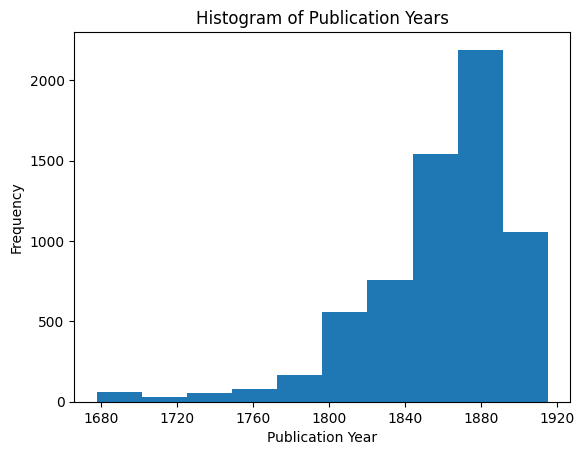

In [29]:
#data['Date of Publication'].dt.year.hist(bins=30)
plt.hist(data['Date of Publication'])
plt.xlabel('Publication Year')
plt.ylabel('Frequency')
plt.title('Histogram of Publication Years')
plt.show()

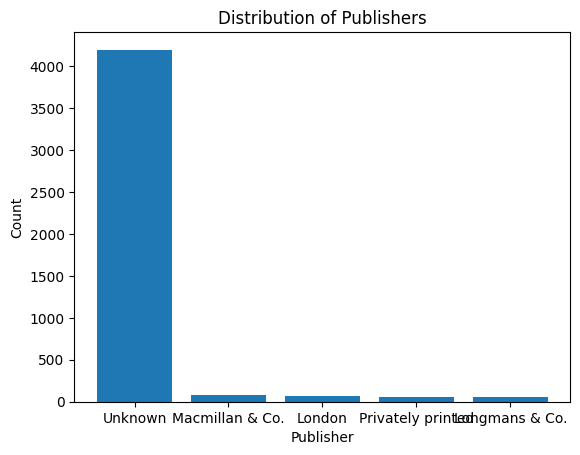

In [34]:
#df['Location'].value_counts().plot(kind='bar')
plt.bar(data['Publisher'].value_counts().index[:5],data['Publisher'].value_counts().head(5))
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.title('Distribution of Publishers')
plt.show()
